In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [26]:
# data set, set features and target
data=pd.read_csv('Apple_data_20years.csv')

features= data[['Open','High','Low','Volume']]


target=data['Close'];target=target.astype(float)
target=data['Close']



# rise or drop
data['change'] = data['Close']-data['Open']
data['up']= data['change']
data['up'][data['change']>=0] = 1
data['up'][data['change']<0] = -1
target1 = data['up']


C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_19852\247056227.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['up'][data['change']>=0] = 1
C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_19852\247056227.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['up'][data['change']<0] = -1


In [27]:
#数据归一化处理
min_max_scaler = preprocessing.MinMaxScaler()#X_scaled = (X - X_min) / (X_max - X_min)
features = min_max_scaler.fit_transform(features)#两列数据转化
 

In [28]:
#数据集划分
split_num=int(len(features)*0.80)
X_train=features[:split_num]
Y_train=target[:split_num]
X_test=features[split_num:]
Y_test=target[split_num:]

Y_train1=target1[:split_num]
Y_test1=target1[split_num:]

# 2. price prediction

In [29]:
def cross_val(model, X, Y):
    pred = cross_val_score(model, X, Y, cv=10)
    return pred.mean()

In [30]:
def print_evaluate(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square:', r2_square)
    print('__________________________________')

## 1.logistics

In [31]:
Y_train1[Y_train1==-1]=0
Y_test1[Y_test1==-1]=0

log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train1)

test_proba = log_reg.predict_proba(X_test)
train_proba = log_reg.predict_proba(X_train)

test_pred = np.where(test_proba[:, 1] > 0.5, 1, 0)
train_pred = np.where(train_proba[:, 1] > 0.5, 1, 0)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test1, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train1, train_pred)


Test set evaluation:
_____________________________________
MAE: 0.5374625374625375
MSE: 0.5374625374625375
RMSE: 0.7331183652470707
R2 Square: -1.1710864745011085
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.4783804048987753
MSE: 0.4783804048987753
RMSE: 0.6916504933120307
R2 Square: -0.9149428736468594
__________________________________


In [32]:
np.unique(Y_test1)

array([0., 1.])

In [33]:
np.unique(test_pred)

array([0, 1])

In [34]:
#test_pred = np.where(test_pred == 0, -1, 1)
#cal(Y_test1, test_pred)
print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test1, test_pred)
accuracy = accuracy_score(Y_test1, test_pred)
print("Test set Accuracy:", accuracy)

print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train1, train_pred)
accuracy = accuracy_score(Y_train1, train_pred)
print("Train set Accuracy:", accuracy)
 
confusion = confusion_matrix(Y_test1, test_pred)
print("Confusion Matrix:")
print(confusion)

report = classification_report(Y_test1, test_pred)
print("Classification Report:")
print(report)

Test set evaluation:
_____________________________________
MAE: 0.5374625374625375
MSE: 0.5374625374625375
RMSE: 0.7331183652470707
R2 Square: -1.1710864745011085
__________________________________
Test set Accuracy: 0.46253746253746253
Train set evaluation:
_____________________________________
MAE: 0.4783804048987753
MSE: 0.4783804048987753
RMSE: 0.6916504933120307
R2 Square: -0.9149428736468594
__________________________________
Train set Accuracy: 0.5216195951012247
Confusion Matrix:
[[446   5]
 [533  17]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.46      0.99      0.62       451
         1.0       0.77      0.03      0.06       550

    accuracy                           0.46      1001
   macro avg       0.61      0.51      0.34      1001
weighted avg       0.63      0.46      0.31      1001



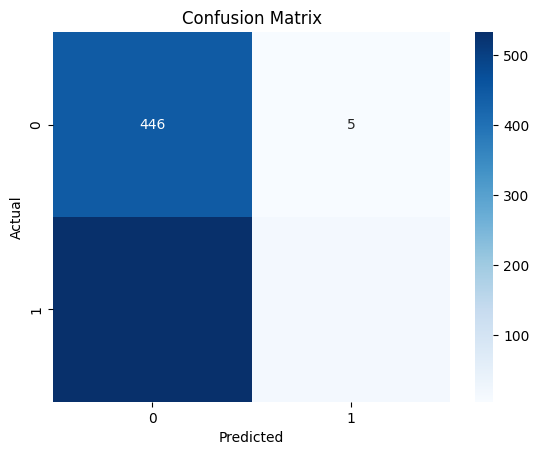

In [35]:
confusion = confusion_matrix(Y_test1, test_pred)

sns.heatmap(confusion, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

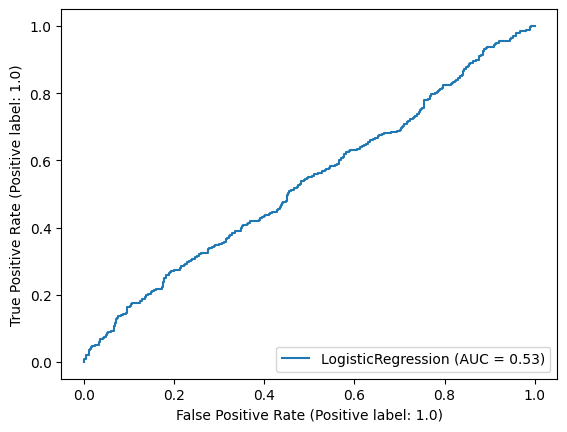

In [36]:
from sklearn.metrics import RocCurveDisplay
roc_display = RocCurveDisplay.from_estimator(log_reg, X_test,Y_test1)


###Prediction Error (MAE, MSE, RMSE): The model's error is relatively large on both the test set and the training set, indicating that the model's predictions are not accurate.

R2 Score: The R2 score is a measure of the model's ability to explain the variability of the target variable. The R2 scores of logistics model on both the test set and the training set are negative, indicating that the model's prediction is very poor, even worse than simply using the mean value of the target variable as a prediction.

Accuracy: Accuracy is the proportion of samples that the model predicts correctly. The model's accuracy is 46.3% on the test set and 52.2% on the training set. Both of these values are not high, indicating poor prediction performance of the model.

Confusion Matrix and Classification Report: The confusion matrix shows that when predicting "down" (0), the model's precision is 0.46, recall is 0.99, and the F1 score is 0.62. When predicting "up" (1), the precision is 0.77, recall is 0.03, and the F1 score is 0.06. This suggests that the model performs very poorly in predicting "up", while performance in predicting "down" is slightly better, but overall, the model's performance is still not good.

AUC: The AUC is the area under the ROC curve, a measure of the model's ability to distinguish between positive and negative classes. The AUC of the model is 0.53, which is barely better than a random prediction (AUC=0.5).

Overall, the model performs extremely poorly in predicting stock price fluctuations. This could be because the features you chose do not explain stock price fluctuations well, or the model needs further adjustment. You may need to try more features or try different models to improve prediction performance.

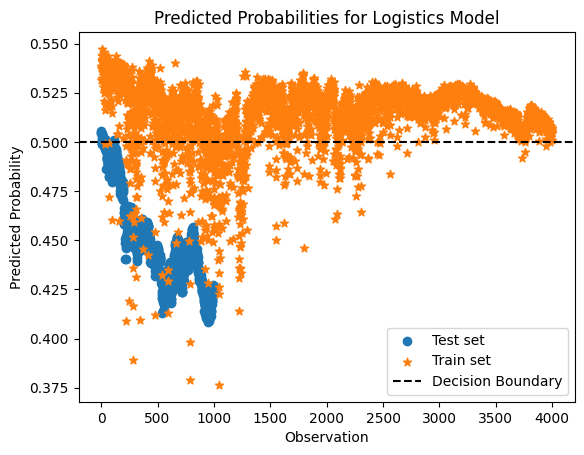

In [37]:
# logistics visual
#sns.set(font_scale=1.2)
#plt.rcParams['font.sans-serif'] = 'SimHei'
#plt.rcParams['axes.unicode_minus'] = False
#plt.rc('font', size=6)
test_index = np.arange(len(test_proba))
train_index = np.arange(len(train_proba))

test_pred_series = pd.Series(test_proba[:, 1], index=test_index)
train_pred_series = pd.Series(train_proba[:, 1], index=train_index)

# Plotting the predicted probabilities
plt.scatter(test_pred_series.index, test_pred_series.values, marker='o', label='Test set')
plt.scatter(train_pred_series.index, train_pred_series.values, marker='*', label='Train set')
plt.axhline(y=0.5, color='black', linestyle='--', label='Decision Boundary')
plt.xlabel('Observation')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probabilities for Logistics Model')
plt.legend()
plt.show()

## 2.probit

In [38]:
Y_train1[Y_train1==-1]=0
Y_test1[Y_test1==-1]=0

probit_model = sm.Probit(Y_train1, X_train)
probit_result = probit_model.fit()

test_pred = probit_result.predict(X_test)
train_pred = probit_result.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test1, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train1, train_pred)

Optimization terminated successfully.
         Current function value: 0.441994
         Iterations 9
Test set evaluation:
_____________________________________
MAE: 0.15530687390225278
MSE: 0.13509038760661765
RMSE: 0.3675464427886871
R2 Square: 0.45430073181931674
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.2906300268511281
MSE: 0.13392268478015343
RMSE: 0.36595448457445284
R2 Square: 0.46391138053893544
__________________________________


In [39]:
threshold = 0.5
binary_pred = np.where(test_pred > threshold, 1, 0)
binary_pred_train= np.where(train_pred > threshold, 1, 0)

In [40]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test1, binary_pred)
accuracy = accuracy_score(Y_test1, binary_pred)
print("Test set Accuracy:", accuracy)

print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train1, binary_pred_train)
accuracy = accuracy_score(Y_train1, binary_pred_train)
print("Train set Accuracy:", accuracy)
 
confusion = confusion_matrix(Y_test1, binary_pred)
print("Confusion Matrix:")
print(confusion)

report = classification_report(Y_test1, binary_pred)
print("Classification Report:")
print(report)

Test set evaluation:
_____________________________________
MAE: 0.14985014985014986
MSE: 0.14985014985014986
RMSE: 0.3871048305693819
R2 Square: 0.3946784922394678
__________________________________
Test set Accuracy: 0.8501498501498501
Train set evaluation:
_____________________________________
MAE: 0.1559610097475631
MSE: 0.1559610097475631
RMSE: 0.3949189913736273
R2 Square: 0.37569260545682326
__________________________________
Train set Accuracy: 0.8440389902524369
Confusion Matrix:
[[388  63]
 [ 87 463]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       451
         1.0       0.88      0.84      0.86       550

    accuracy                           0.85      1001
   macro avg       0.85      0.85      0.85      1001
weighted avg       0.85      0.85      0.85      1001



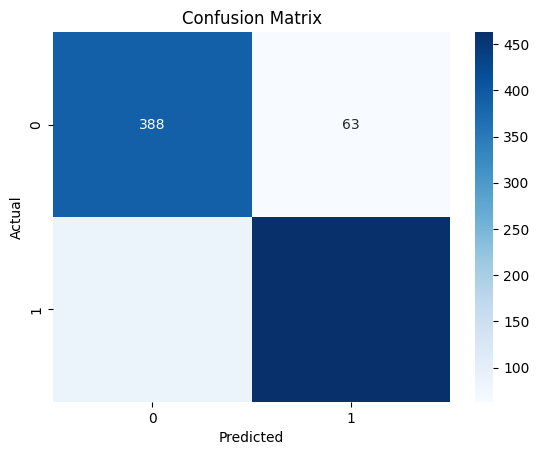

In [41]:
confusion = confusion_matrix(Y_test1, binary_pred)

sns.heatmap(confusion, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

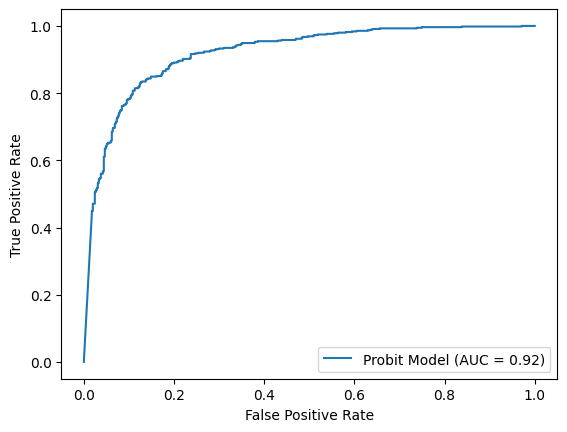

In [42]:
from sklearn.metrics import roc_curve, RocCurveDisplay, auc
fpr, tpr, _ = roc_curve(Y_test1, test_pred)
roc_auc = auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Probit Model')
roc_display.plot()

###Prediction error (MAE, MSE, RMSE): The model's prediction error (Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error) is relatively low on both the test and training sets, which indicates that the model's predictions are fairly accurate.

R2 score: The R2 score measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s). The R2 scores for the model on the test and training sets are 0.395 and 0.376, respectively. This means that the model can explain around 38% to 40% of the variance in the target variable, which is a decent result.

Accuracy: Accuracy is the proportion of true results (both true positives and true negatives) in the total number of cases examined. The model has an accuracy of 85% on the test set and 84.4% on the training set, which suggests that it correctly predicts the majority of cases.

Confusion matrix and Classification report: The confusion matrix and classification report provide a more detailed view of the model's performance. The model has a precision, recall, and F1 score of 0.82, 0.86, and 0.84, respectively, for predicting "falls" (0), and 0.88, 0.84, and 0.86, respectively, for predicting "rises" (1). This indicates that the model performs quite well in predicting both "rises" and "falls", with slightly better performance in predicting "rises".

AUC: AUC stands for "Area under the ROC Curve", which measures the entire two-dimensional area underneath the entire ROC curve (from (0,0) to (1,1)). The model has an AUC of 0.92, which is a great score and suggests that the model has a high ability to distinguish between "rises" and "falls".

In summary, the Probit regression model performs quite well in predicting stock price increases or decreases, with good accuracy, a decent R2 score, and a high AUC. It suggests that the model has learned useful patterns from the features and is able to utilize these patterns to make accurate predictions.

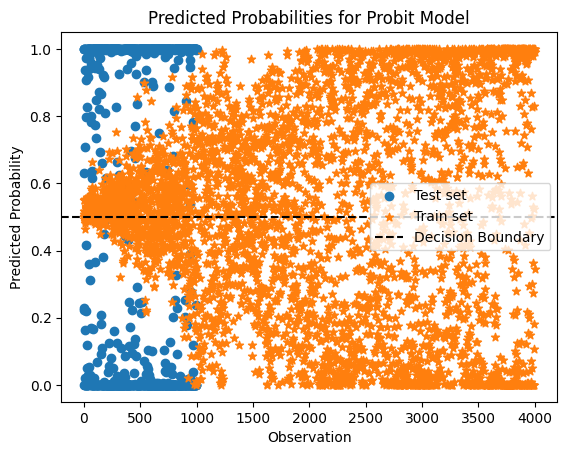

In [20]:
# probit visual
#sns.set(font_scale=1.2)
#plt.rcParams['font.sans-serif'] = 'SimHei'
#plt.rcParams['axes.unicode_minus'] = False
#plt.rc('font', size=6)

# Create index for test_pred and train_pred
test_index = np.arange(len(test_pred))
train_index = np.arange(len(train_pred))

# Convert test_pred and train_pred to pandas Series
test_pred_series = pd.Series(test_pred, index=test_index)
train_pred_series = pd.Series(train_pred, index=train_index)

# Plotting the predicted probabilities
plt.scatter(test_pred_series.index, test_pred_series.values, marker='o', label='Test set')
plt.scatter(train_pred_series.index, train_pred_series.values, marker='*', label='Train set')
plt.axhline(y=0.5, color='black', linestyle='--', label='Decision Boundary')
plt.xlabel('Observation')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probabilities for Probit Model')
plt.legend()
plt.show()